# Actividad Práctica: Implementación y Comparación de Modelos con Regularización

## Introducción a la Actividad

**Objetivo:**

- Implementar modelos de regresión lineal, polinómica, Ridge y Lasso utilizando un conjunto de datos real.
- Comparar el rendimiento de los modelos y analizar el impacto de la regularización y la multicolinealidad.

**Dataset Propuesto:**

- Utilizar el conjunto de datos 'Wine Quality' disponible en UCI Machine Learning Repository.
- Datos sobre características químicas de vinos y su calidad.

**Tareas:**

- Cargar y explorar el dataset.
- Detectar y manejar la multicolinealidad.
- Implementar regresión lineal y polinómica.
- Aplicar Ridge y Lasso.
- Comparar resultados y extraer conclusiones.

## Paso 1 - Carga y Exploración del Dataset

**Cargar el Dataset:**



In [1]:
import pandas as pd

df = pd.read_csv('./data/winequality-red.csv', sep=',')

**Exploración Inicial:**
- Visualizar las primeras filas con df.head().
- Obtener información del dataset con df.info().
- Describir las variables con df.describe().




In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



La variable objetivo es 'quality', una medida de la calidad del vino.

## Paso 2 - Detección y Manejo de la Multicolinealidad

**Matriz de Correlación:**


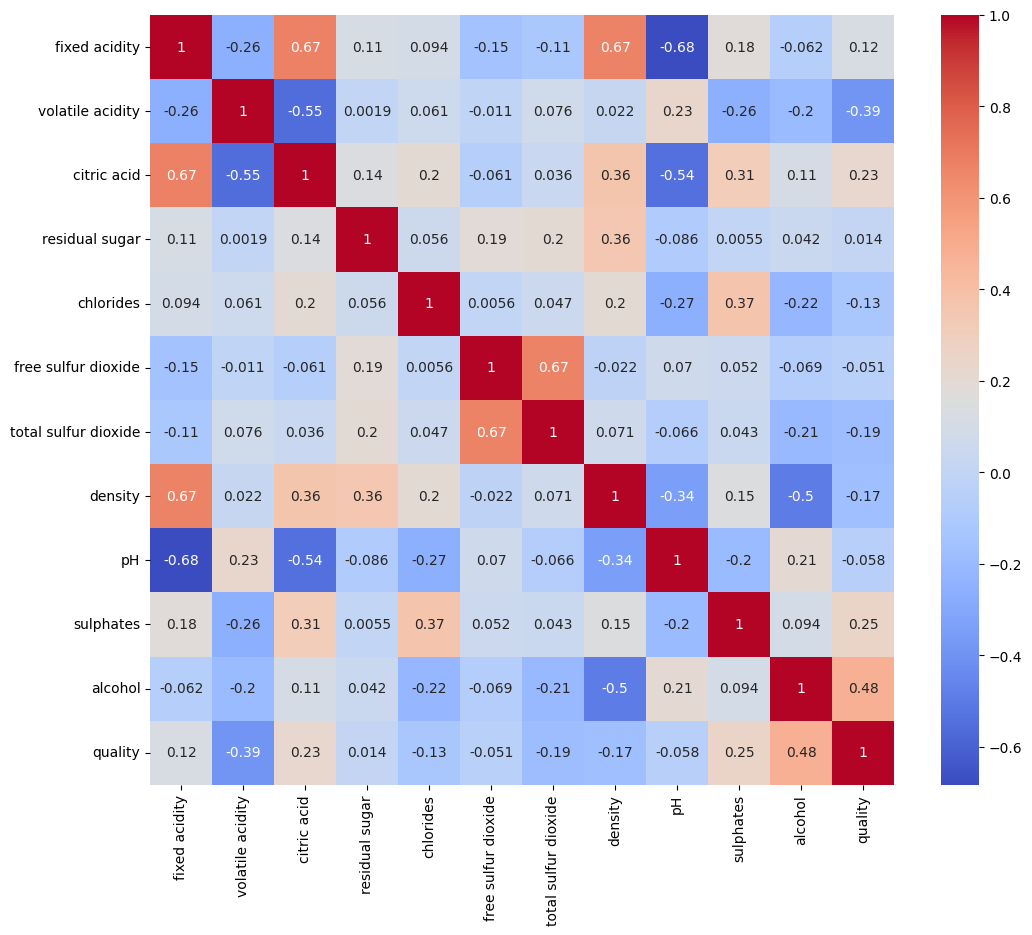

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


**Análisis del VIF:**



In [7]:
!pip3 install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('quality', axis=1) # Excluir la variable objetivo
vif_data = pd.DataFrame() # Crear un DataFrame para almacenar los resultados
vif_data["feature"] = X.columns # Asignar las características al DataFrame
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] # Calcular el factor de inflación de la varianza para cada característica
vif_data.head(20)


,feature,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


**Manejo de Multicolinealidad:**

- Decidir si eliminar variables altamente correlacionadas.
- Considerar combinar variables o aplicar técnicas de regularización.

## Paso 3 - Implementación de Modelos de Regresión

**Preparar los Datos:**



In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Regresión Lineal Simple:**



In [16]:
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)


**Regresión Polinómica:**



In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_train_poly, y_train)
y_pred_polinomico = modelo_polinomico.predict(X_test_poly)


**Evaluación de Modelos:**



In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_polinomico = mean_squared_error(y_test, y_pred_polinomico)
r2_polinomico = r2_score(y_test, y_pred_polinomico)


print(f'MSE Lineal: {mse_lineal}, R2 Lineal: {r2_lineal}')
print(f'MSE Polinómico: {mse_polinomico}, R2 Polinómico: {r2_polinomico}')



MSE Lineal: 0.3900251439639543, R2 Lineal: 0.40318034127962277
MSE Polinómico: 0.5096119958564003, R2 Polinómico: 0.22018756443318954


## Paso 4 - Aplicación de Ridge y Lasso

**Regresión Ridge:**



In [29]:
from sklearn.linear_model import Ridge

modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


**Regresión Lasso:**



In [30]:
from sklearn.linear_model import Lasso

modelo_lasso = Lasso(alpha=0.1)
modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


**Comparación de Coeficientes:**

- Analizar cómo cambian los coeficientes con cada método.
- Identificar variables que son eliminadas por Lasso.

## Paso 5 - Comparación y Conclusiones

**Comparación de Métricas:**
- Crear una tabla resumen con MSE y $R^2$ de cada modelo.

**Análisis de Resultados:**
- ¿Cuál modelo tuvo el mejor rendimiento?
- ¿Cómo afectó la regularización al sobreajuste?
- ¿Se observó mejora al manejar la multicolinealidad?

**Conclusiones:**
- Reflexionar sobre la importancia de seleccionar y regularizar adecuadamente los modelos.
- Discutir limitaciones y posibles mejoras.




       Modelo       MSE       R^2
0       Lasso  0.498675  0.236923
1       Ridge  0.392949  0.398706
2  Polinómico  0.509612  0.220188
3      Lineal  0.390025  0.403180


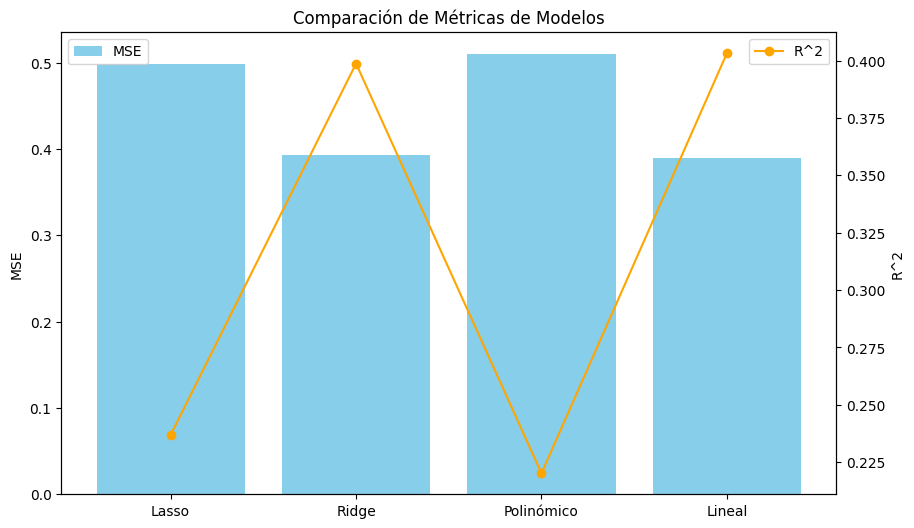

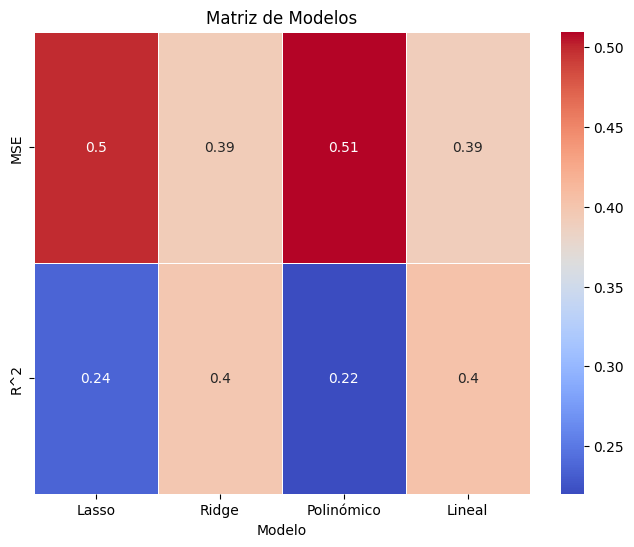

In [36]:
import pandas as pd

# Crear un DataFrame con los resultados de las métricas
resultados = pd.DataFrame({
    'Modelo': ['Lasso', 'Ridge', 'Polinómico', 'Lineal'],
    'MSE': [mse_lasso, mse_ridge, mse_polinomico, mse_lineal],
    'R^2': [r2_lasso, r2_ridge, r2_polinomico, r2_lineal]
})

# Mostrar la tabla resumen
print(resultados)

import matplotlib.pyplot as plt

# Dibujar los resultados
fig, ax = plt.subplots(figsize=(10, 6))

# Crear una gráfica de barras para MSE
ax.bar(resultados['Modelo'], resultados['MSE'], color='skyblue', label='MSE')
ax.set_ylabel('MSE')
ax.set_title('Comparación de Métricas de Modelos')
ax.legend(loc='upper left')

# Crear un segundo eje y para R^2
ax2 = ax.twinx()
ax2.plot(resultados['Modelo'], resultados['R^2'], color='orange', marker='o', label='R^2')
ax2.set_ylabel('R^2')
ax2.legend(loc='upper right')

plt.show()


# could you plot headmap of the results?
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(resultados.set_index('Modelo').T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Modelos')
plt.show()



# Interpretacion de las metricas

Modelo       MSE       R^2
0       Lasso  0.498675  0.236923
1       Ridge  0.392949  0.398706
2  Polinómico  0.509612  0.220188
3      Lineal  0.390025  0.403180

## Error cuadratico medio (MSE)

 - Menor MSE, mejor rendimiento del modelo.
 
 Resultados:
 - Lineal: 0.390025 (mejor)
 - Ridge: 0.393 
 - Lasso: 0.498675
 - Polinómico: 0.510 (peor)


## Coeficiente de determinacion (R^2)
 - R^2 cercano a 1, mejor rendimiento del modelo.

 Resultados:
 - Lineal: 0.403180 (mejor)
 - Ridge: 0.398706  
 - Lasso: 0.236923
 - Polinómico: 0.220188 (peor)



Coeficiente 0: 0.023085333909276414
Coeficiente 1: -1.0013044340678185
Coeficiente 2: -0.14082146122413142
Coeficiente 3: 0.006564311041477647
Coeficiente 4: -1.8065031490473669
Coeficiente 5: 0.005627334387082981
Coeficiente 6: -0.0036444489338688622
Coeficiente 7: -10.351593588830111
Coeficiente 8: -0.3936877323398658
Coeficiente 9: 0.8411716226093199
Coeficiente 10: 0.28188956740919036


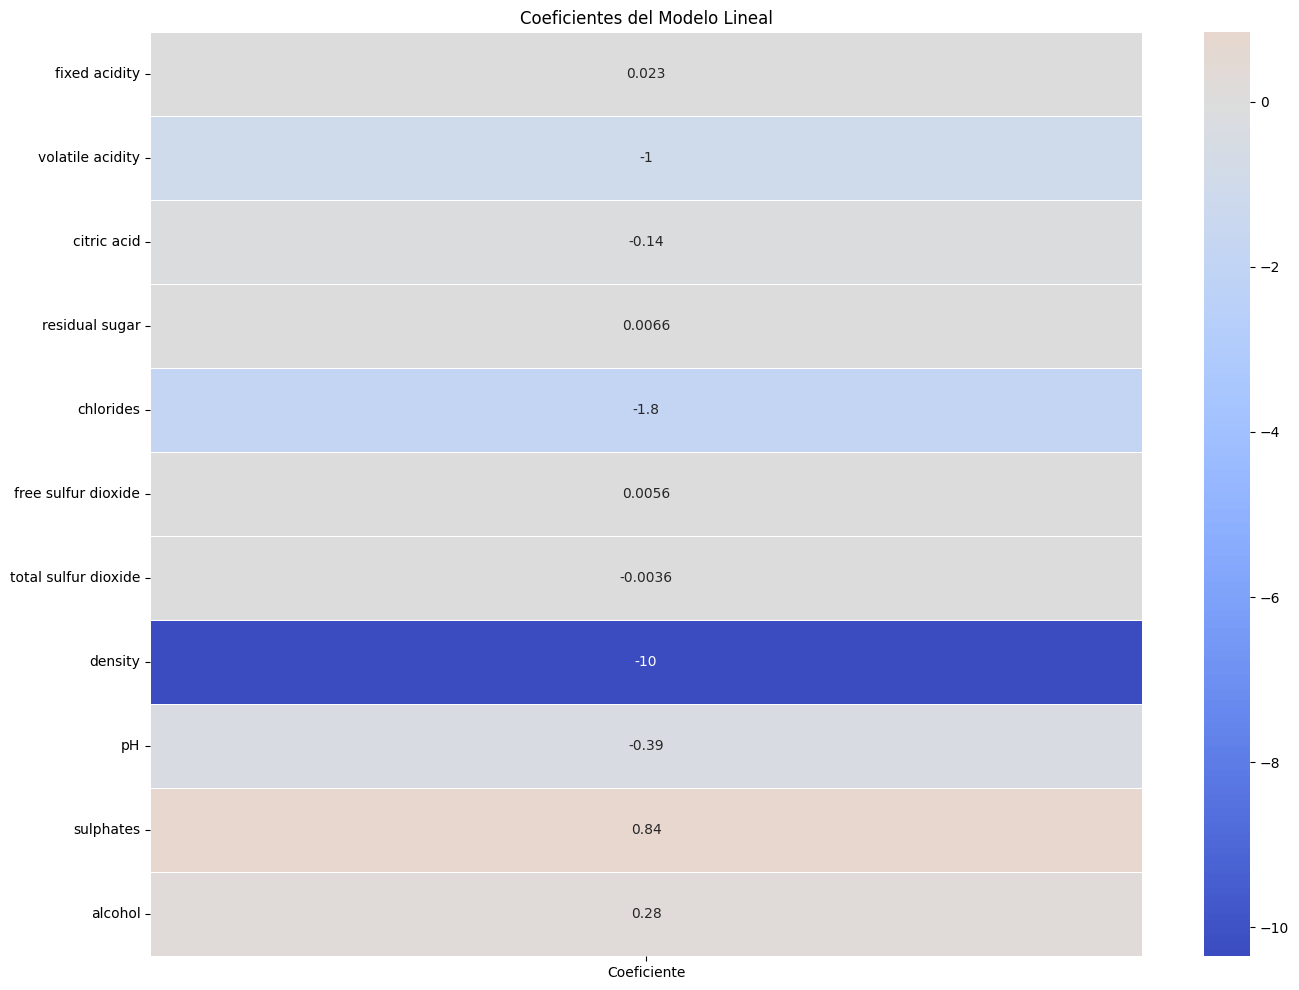

In [53]:
# print the coefficients of the lineal model one by one
for i, coef in enumerate(modelo_lineal.coef_):
    print(f'Coeficiente {i}: {coef}')

# create a dataframe with the coefficients of the lineal model
coeficientes_lineal = pd.DataFrame(modelo_lineal.coef_, index=X.columns, columns=['Coeficiente'])
coeficientes_lineal

plt.figure(figsize=(16, 12))
sns.heatmap(coeficientes_lineal, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Coeficientes del Modelo Lineal')
plt.show()



# print(modelo_polinomico.coef_)
# print(modelo_ridge.coef_)
# print(modelo_lasso.coef_)
